In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import pickle

In [2]:
import os
import pickle
import numpy as np

def load_and_format_results_one_file(file_path, special_word):
    pkl_file = os.path.basename(file_path)
    try:
        with open(file_path, 'rb') as f:
            results = pickle.load(f)
            if isinstance(results, dict):
                mean_results = {}
                std_results = {}
                for key in results[0].keys():
                    if special_word in key.lower():  # Vérifie si "volume" est dans la clé
                        # Extract values for the current key across experiments
                        values = [results[exp][key] for exp in results]

                        # Remove the minimum and maximum values
                        values_sorted = sorted(values)
                        values_trimmed = values_sorted[1:-1]  # Exclude first (min) and last (max)

                        # Calculate the mean of the remaining values
                        mean_results[key] = np.mean(values_trimmed)
                        std_results[key] = np.std(values_trimmed, ddof=1)  # Sample std deviation
                
                return mean_results, std_results
            else:
                print(f"Warning: {pkl_file} does not contain a dictionary.")
                return None, None
    except Exception as e:
        print(f"Failed to load {pkl_file}: {e}")
        return None, None

def load_and_format_volume_results(folder_path, alpha, n_numbers=3):
    """
    Load and format the contents of all .pkl files in the specified folder.
    """
    if not os.path.exists(folder_path):
        print(f"The folder '{folder_path}' does not exist.")
        return

    pkl_files = [f for f in os.listdir(folder_path) if f.endswith('.pkl') and 'tab' not in f]

    if not pkl_files:
        print("No .pkl files found in the folder.")
        return
    
    all_results = {}
    for pkl_file in pkl_files:
        file_path = os.path.join(folder_path, pkl_file)
        mean_results, std_results = load_and_format_results_one_file(file_path, "volume")
        if mean_results is not None:
            all_results[pkl_file] = (mean_results, std_results)
    
    # Generate LaTeX formatted output
    datasets = list(all_results.keys())
    keys = list(next(iter(all_results.values()))[0].keys())  # Get volume-related keys
    
    keys = ["volume_hyper_rectangle", "volume_covariance", "volume_local_covariance", "volume_ellipsoid"]

    latex_output = "Dataset " + " & " + " & ".join(keys) + "\\\\ \\hline\n"
    for dataset in sorted(datasets):  # Sorting datasets alphabetically
        if f"alpha_{alpha}" in dataset.lower():
            row = f"{dataset[:10].replace('_', ' ')} "  # Display only the first 10 characters of dataset with underscores replaced by spaces
            mean_results, std_results = all_results[dataset]
            for key in keys:
                # Find the smallest value in the row for the current dataset
                values = [mean_results[k] for k in keys]
                min_value = min(values)
                
                # Format the result, applying \textbf to the smallest value
                if mean_results[key] == min_value:
                    formatted_result = f"\\textbf{{{mean_results[key]:.{n_numbers}f}}} \pm {std_results[key]:.{n_numbers}f}"
                else:
                    formatted_result = f"{mean_results[key]:.{n_numbers}f} \pm {std_results[key]:.{n_numbers}f}"
                
                row += f" & ${formatted_result}$ "
            row += "\\\\ \\hline\n"
            latex_output += row

    print(latex_output)

def load_and_format_coverage_results(folder_path, alpha, n_numbers=3):
    """
    Load and format the contents of all .pkl files in the specified folder.
    """
    if not os.path.exists(folder_path):
        print(f"The folder '{folder_path}' does not exist.")
        return

    pkl_files = [f for f in os.listdir(folder_path) if f.endswith('.pkl') and 'tab' not in f]

    if not pkl_files:
        print("No .pkl files found in the folder.")
        return
    
    all_results = {}
    for pkl_file in pkl_files:
        file_path = os.path.join(folder_path, pkl_file)
        mean_results, std_results = load_and_format_results_one_file(file_path, "coverage")
        if mean_results is not None:
            all_results[pkl_file] = (mean_results, std_results)
    
    # Generate LaTeX formatted output
    datasets = list(all_results.keys())
    keys = list(next(iter(all_results.values()))[0].keys())  # Get volume-related keys
    
    keys = ["coverage_hyper_rectangle", "coverage_covariance", "coverage_local_covariance", "coverage_ellipsoid"]

    latex_output = "Dataset " + " & " + " & ".join(keys) + "\\\\ \\hline\n"
    for dataset in sorted(datasets):  # Sorting datasets alphabetically
        if f"alpha_{alpha}" in dataset.lower():
            row = f"{dataset[:10].replace('_', ' ')} "  # Display only the first 10 characters of dataset with underscores replaced by spaces
            mean_results, std_results = all_results[dataset]
            for key in keys:
                # Find the smallest value in the row for the current dataset
                values = [mean_results[k] for k in keys]
                min_value = min(values)
                
                # Format the result, applying \textbf to the smallest value
                
                formatted_result = f"{mean_results[key]:.{n_numbers}f} \pm {std_results[key]:.{n_numbers}f}"
                
                row += f" & ${formatted_result}$ "
            row += "\\\\ \\hline\n"
            latex_output += row

    print(latex_output)



In [3]:
# load_and_format_volume_results("new_results", alpha = 0.1, n_numbers=6)
# print("\n\n")
# load_and_format_coverage_results("new_results", alpha = 0.1)
# print("\n\n")
# load_and_format_volume_results("new_results", alpha = 0.01, n_numbers=3)
# print("\n\n")
# load_and_format_coverage_results("new_results", alpha = 0.01)
# print("\n\n")
load_and_format_volume_results("new_synthetic_results", alpha = 0.1, n_numbers=0)
print("\n\n")
load_and_format_coverage_results("new_synthetic_results", alpha = 0.1)
print("\n\n")
load_and_format_volume_results("new_synthetic_results", alpha = 0.01, n_numbers=0)
print("\n\n")
load_and_format_coverage_results("new_synthetic_results", alpha = 0.01)
print("\n\n")

The folder 'new_synthetic_results' does not exist.



The folder 'new_synthetic_results' does not exist.



The folder 'new_synthetic_results' does not exist.



The folder 'new_synthetic_results' does not exist.





In [5]:
import os
import pickle
import numpy as np

def load_and_format_results_one_file(file_path, special_word):
    pkl_file = os.path.basename(file_path)
    try:
        with open(file_path, 'rb') as f:
            results = pickle.load(f)
            if isinstance(results, dict):
                mean_results = {}
                std_results = {}
                for key in results[0].keys():
                    if special_word in key.lower():  # Vérifie si "volume" est dans la clé
                        # Extract values for the current key across experiments
                        if special_word == "volume":
                            values = [results[exp][key]/results[exp]["volume_ellipsoid"] for exp in results]
                        else:
                            values = [100*results[exp][key] for exp in results]

                        # Remove the minimum and maximum values
                        values_sorted = sorted(values)
                        values_trimmed = values_sorted[1:-1]  # Exclude first (min) and last (max)

                        # Calculate the mean of the remaining values
                        mean_results[key] = np.mean(values_trimmed)
                        std_results[key] = np.std(values_trimmed, ddof=1)  # Sample std deviation
                
                return mean_results, std_results
            else:
                print(f"Warning: {pkl_file} does not contain a dictionary.")
                return None, None
    except Exception as e:
        print(f"Failed to load {pkl_file}: {e}")
        return None, None

def load_and_format_volume_results(folder_path, alpha, n_numbers=3):
    """
    Load and format the contents of all .pkl files in the specified folder.
    """
    if not os.path.exists(folder_path):
        print(f"The folder '{folder_path}' does not exist.")
        return

    pkl_files = [f for f in os.listdir(folder_path) if f.endswith('.pkl') and 'tab' not in f]

    if not pkl_files:
        print("No .pkl files found in the folder.")
        return
    
    all_results = {}
    for pkl_file in pkl_files:
        file_path = os.path.join(folder_path, pkl_file)
        mean_results, std_results = load_and_format_results_one_file(file_path, "volume")
        if mean_results is not None:
            all_results[pkl_file] = (mean_results, std_results)
    
    # Generate LaTeX formatted output
    datasets = list(all_results.keys())
    keys = list(next(iter(all_results.values()))[0].keys())  # Get volume-related keys
    
    keys = ["volume_hyper_rectangle", "volume_covariance", "volume_local_covariance", "volume_ellipsoid"]

    latex_output = "Dataset " + " & " + " & ".join(keys) + "\\\\ \\hline\n"
    for dataset in sorted(datasets):  # Sorting datasets alphabetically
        if f"alpha_{alpha}" in dataset.lower():
            row = f"{dataset[:10].replace('_', ' ')} "  # Display only the first 10 characters of dataset with underscores replaced by spaces
            mean_results, std_results = all_results[dataset]
            for key in keys:
                # Find the smallest value in the row for the current dataset
                values = [mean_results[k] for k in keys]
                min_value = min(values)
                
                # Format the result, applying \textbf to the smallest value
                if mean_results[key] == min_value:
                    formatted_result = f"\\textbf{{{mean_results[key]:.{n_numbers}f}}} \pm {std_results[key]:.{n_numbers}f}"
                else:
                    formatted_result = f"{mean_results[key]:.{n_numbers}f} \pm {std_results[key]:.{n_numbers}f}"
                
                row += f" & ${formatted_result}$ "
            row += "\\\\ \\hline\n"
            latex_output += row

    print(latex_output)

def load_and_format_coverage_results(folder_path, alpha, n_numbers=3, n_numbers_std=1):
    """
    Load and format the contents of all .pkl files in the specified folder.
    """
    if not os.path.exists(folder_path):
        print(f"The folder '{folder_path}' does not exist.")
        return

    pkl_files = [f for f in os.listdir(folder_path) if f.endswith('.pkl') and 'tab' not in f]

    if not pkl_files:
        print("No .pkl files found in the folder.")
        return
    
    all_results = {}
    for pkl_file in pkl_files:
        file_path = os.path.join(folder_path, pkl_file)
        mean_results, std_results = load_and_format_results_one_file(file_path, "coverage")
        if mean_results is not None:
            all_results[pkl_file] = (mean_results, std_results)
    
    # Generate LaTeX formatted output
    datasets = list(all_results.keys())
    keys = list(next(iter(all_results.values()))[0].keys())  # Get volume-related keys
    
    keys = ["coverage_hyper_rectangle", "coverage_covariance", "coverage_local_covariance", "coverage_ellipsoid"]

    latex_output = "Dataset " + " & " + " & ".join(keys) + "\\\\ \\hline\n"
    for dataset in sorted(datasets):  # Sorting datasets alphabetically
        if f"alpha_{alpha}" in dataset.lower():
            row = f"{dataset[:10].replace('_', ' ')} "  # Display only the first 10 characters of dataset with underscores replaced by spaces
            mean_results, std_results = all_results[dataset]
            for key in keys:
                # Find the smallest value in the row for the current dataset
                values = [mean_results[k] for k in keys]
                min_value = min(values)
                
                # Format the result, applying \textbf to the smallest value
                
                # formatted_result = f"{mean_results[key]:.{n_numbers}f} \pm {std_results[key]:.{n_numbers}f}"
                formatted_result = f"{mean_results[key]:.{n_numbers}f} \pm {std_results[key]:.{n_numbers_std}f}"
                
                row += f" & ${formatted_result}$ "
            row += "\\\\ \\hline\n"
            latex_output += row

    print(latex_output)



In [11]:
load_and_format_volume_results("volume", alpha = 0.1, n_numbers=2)
print("\n\n")
load_and_format_coverage_results("volume", alpha = 0.1, n_numbers=1, n_numbers_std=1)
print("\n\n")
load_and_format_volume_results("volume", alpha = 0.01, n_numbers=2)
print("\n\n")
load_and_format_coverage_results("volume", alpha = 0.01, n_numbers=1, n_numbers_std=1)
print("\n\n")
load_and_format_volume_results("volume_s", alpha = 0.1, n_numbers=2)
print("\n\n")
load_and_format_coverage_results("volume_s", alpha = 0.1, n_numbers=1, n_numbers_std=1)
print("\n\n")
load_and_format_volume_results("volume_s", alpha = 0.01, n_numbers=2)
print("\n\n")
load_and_format_coverage_results("volume_s", alpha = 0.01, n_numbers=1, n_numbers_std=1)
print("\n\n")

Dataset  & volume_hyper_rectangle & volume_covariance & volume_local_covariance & volume_ellipsoid\\ \hline
Bias corre  & $1.00 \pm 0.23$  & $\textbf{0.96} \pm 0.23$  & $1.25 \pm 0.33$  & $1.00 \pm 0.00$ \\ \hline
casp01 CAS  & $1.12 \pm 0.03$  & $1.33 \pm 0.02$  & $1.19 \pm 0.03$  & $\textbf{1.00} \pm 0.00$ \\ \hline
energy01 e  & $1.81 \pm 0.57$  & $1.27 \pm 0.26$  & $1.27 \pm 0.26$  & $\textbf{1.00} \pm 0.00$ \\ \hline
house01 ho  & $1.07 \pm 0.06$  & $1.10 \pm 0.03$  & $1.09 \pm 0.03$  & $\textbf{1.00} \pm 0.00$ \\ \hline
rf101 rf1   & $3.23 \pm 2.36$  & $3.32 \pm 1.71$  & $60.21 \pm 36.39$  & $\textbf{1.00} \pm 0.00$ \\ \hline
rf201 rf2   & $91.24 \pm 41.98$  & $4.18 \pm 1.42$  & $5.95 \pm 2.10$  & $\textbf{1.00} \pm 0.00$ \\ \hline
scm1d 10 a  & $23704.13 \pm 26820.17$  & $17.62 \pm 11.81$  & $17.62 \pm 11.81$  & $\textbf{1.00} \pm 0.00$ \\ \hline
scm20d 10   & $2715970.65 \pm 3639458.87$  & $29273.46 \pm 38766.97$  & $29273.46 \pm 38766.97$  & $\textbf{1.00} \pm 0.00$ \\ \hline


Contents of tab_concrete_data_10_adjusting_center_0.8_0.1_0.1_256_100_loss_strategy_realschedulerFalse.pkl:
Failed to load tab_concrete_data_10_adjusting_center_0.8_0.1_0.1_256_100_loss_strategy_realschedulerFalse.pkl: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.



Contents of tab_rf2_10_not_adujsting_center_0.8_0.1_0.01_256_256_loss_strategy_realschedulerTrue.pkl:
Failed to load tab_rf2_10_not_adujsting_center_0.8_0.1_0.01_256_256_loss_strategy_realschedulerTrue.pkl: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.



Contents of tab_rf1_10_not_adujsting_center_0.8_0.1_0.01_256_256_loss_strategy_realschedulerTrue.pkl:


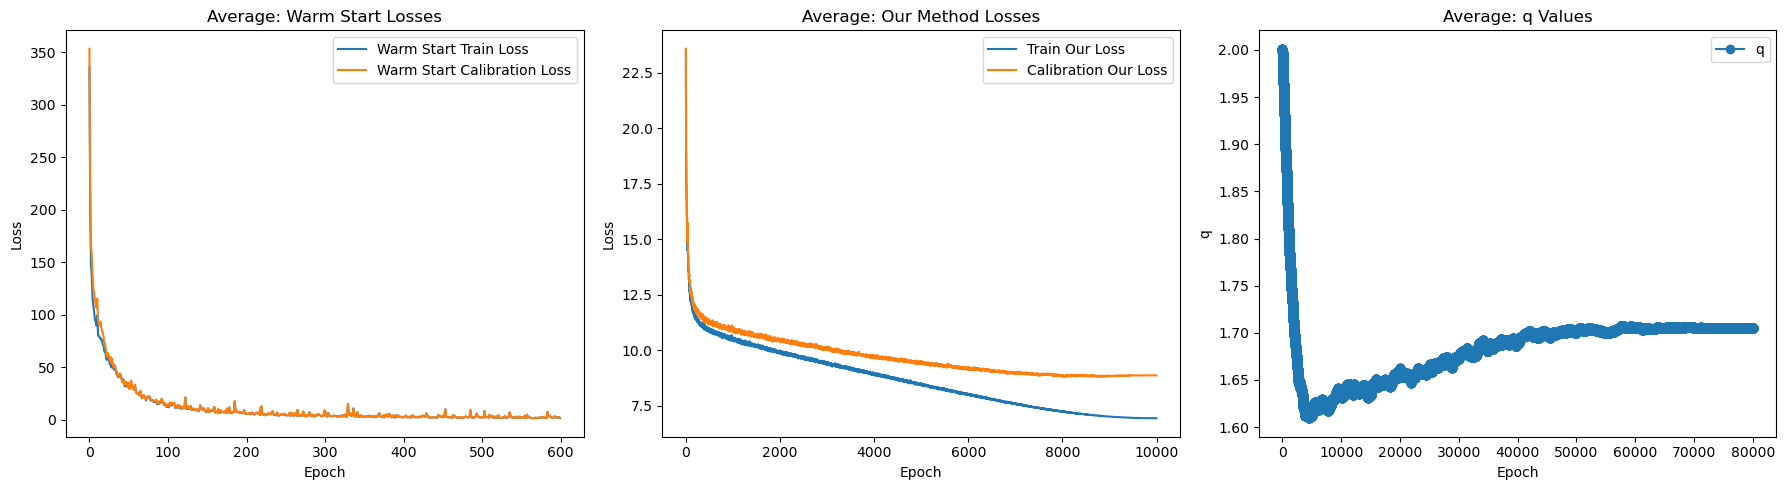




Contents of tab_UJIndoorLoc_10_not_adujsting_center_0.8_0.1_0.01_256_256_schedulerTrue.pkl:


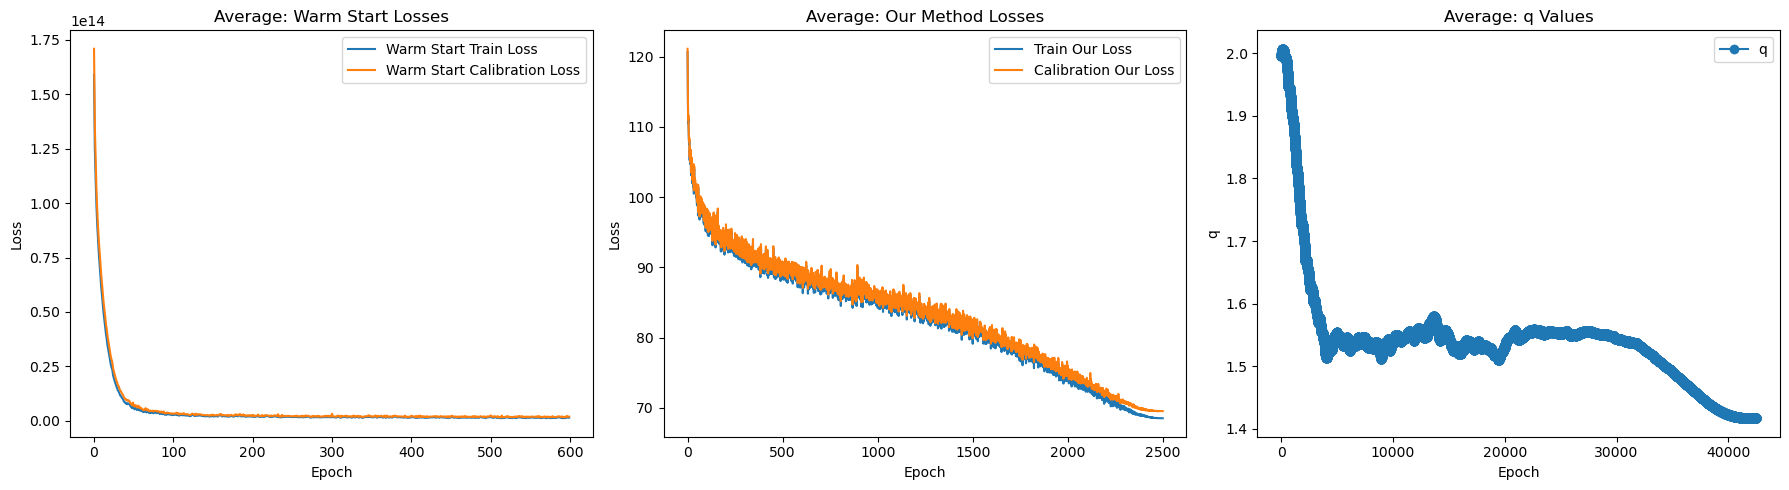

In [2]:
# Specify the path to the results folder
results_folder = "tab_results"
load_and_plot_results_averaged(results_folder)

In [3]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

def load_and_print_results_one_file(file_path):
    pkl_file = os.path.basename(file_path)
    try:
        with open(file_path, 'rb') as f:
            results = pickle.load(f)
            if isinstance(results, dict):
                print(f"Contents of {pkl_file}:")
                mean_results = {}
                for key in results[0].keys():
                    # Extract values for the current key across experiments
                    values = [results[exp][key] for exp in results]
                    
                    # Remove the minimum and maximum values
                    values_sorted = sorted(values)
                    values_trimmed = values_sorted[1:-1]  # Exclude first (min) and last (max)
                    
                    # Calculate the mean of the remaining values
                    mean_results[key] = np.mean(values_trimmed)

                for key, value in mean_results.items():
                    print(f"{key:>50}: {value:.6f}")
            else:
                print(f"Warning: {pkl_file} does not contain a dictionary.")
    except Exception as e:
        print(f"Failed to load {pkl_file}: {e}")
    print("\n\n")


def load_and_print_results(folder_path):
    """
    Load and print the contents of all .pkl files in the specified folder.

    Parameters:
        folder_path (str): Path to the folder containing .pkl files.
    """
    if not os.path.exists(folder_path):
        print(f"The folder '{folder_path}' does not exist.")
        return

    # List all .pkl files in the folder
    pkl_files = [f for f in os.listdir(folder_path) if f.endswith('.pkl') and 'tab' not in f]

    if not pkl_files:
        print("No .pkl files found in the folder.")
        return

    # Iterate through each .pkl file, load and print its content
    for pkl_file in pkl_files:
        file_path = os.path.join(folder_path, pkl_file)
        load_and_print_results_one_file(file_path)



def load_and_plot_results_averaged_one_file(file_path):
    pkl_file = os.path.basename(file_path)
    print(f"Contents of {pkl_file}:")
    try:
        with open(file_path, 'rb') as f:
            tab_results = pickle.load(f)
            if isinstance(tab_results, dict):    
                # Compute average results
                num_experiments = len(tab_results)
                keys = list(tab_results.values())[0].keys()

                average_results = {key: np.mean([tab_results[exp][key] for exp in tab_results], axis=0) for key in keys}

                # Plot average results
                fig, axes = plt.subplots(1, 3, figsize=(18, 5))

                # First plot: Warm start train and calibration losses
                axes[0].plot(average_results["warm_start_train_loss"][200:], label="Warm Start Train Loss")
                axes[0].plot(average_results["warm_start_calibration_loss"][200:], label="Warm Start Calibration Loss")
                axes[0].set_title("Average: Warm Start Losses")
                axes[0].set_xlabel("Epoch")
                axes[0].set_ylabel("Loss")
                axes[0].legend()

                # Second plot: Train and calibration losses (our method)
                axes[1].plot(average_results["train_our_loss"][:200], label="Train Our Loss")
                axes[1].plot(average_results["calibration_our_loss"][:200], label="Calibration Our Loss")
                axes[1].set_title("Average: Our Method Losses")
                axes[1].set_xlabel("Epoch")
                axes[1].set_ylabel("Loss")
                axes[1].legend()

                # Third plot: q values
                axes[2].plot(average_results["q"], label="q", marker="o")
                axes[2].set_title("Average: q Values")
                axes[2].set_xlabel("Epoch")
                axes[2].set_ylabel("q")
                axes[2].legend()

                plt.tight_layout()
                plt.show()
            else:
                print(f"Warning: {pkl_file} does not contain a dictionary.")
    except Exception as e:
        print(f"Failed to load {pkl_file}: {e}")
    print("\n\n")

def load_and_plot_results_averaged(folder_path):
    """
    Load and print the contents of all .pkl files in the specified folder.

    Parameters:
        folder_path (str): Path to the folder containing .pkl files.
    """
    if not os.path.exists(folder_path):
        print(f"The folder '{folder_path}' does not exist.")
        return

    # List all .pkl files in the folder
    pkl_files = [f for f in os.listdir(folder_path) if f.endswith('.pkl') and 'tab' in f]

    if not pkl_files:
        print("No .pkl files found in the folder.")
        return

    # Iterate through each .pkl file, load and print its content
    for pkl_file in pkl_files:
        file_path = os.path.join(folder_path, pkl_file)
        load_and_plot_results_averaged_one_file(file_path)



def load_and_plot_results_one_by_one_one_file(file_path):
    pkl_file = os.path.basename(file_path)
    print(f"Contents of {pkl_file}:")
    try:
        with open(file_path, 'rb') as f:
            tab_results = pickle.load(f)
            if isinstance(tab_results, dict):
                for experiment, results in tab_results.items():
                    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

                    # First plot: Warm start train and calibration losses
                    axes[0].plot(results["warm_start_train_loss"], label="Warm Start Train Loss")
                    axes[0].plot(results["warm_start_calibration_loss"], label="Warm Start Calibration Loss")
                    axes[0].set_title(f"{experiment}: Warm Start Losses")
                    axes[0].set_xlabel("Epoch")
                    axes[0].set_ylabel("Loss")
                    axes[0].legend()

                    # Second plot: Train and calibration losses (our method)
                    axes[1].plot(results["train_our_loss"], label="Train Our Loss")
                    axes[1].plot(results["calibration_our_loss"], label="Calibration Our Loss")
                    axes[1].set_title(f"{experiment}: Our Method Losses")
                    axes[1].set_xlabel("Epoch")
                    axes[1].set_ylabel("Loss")
                    axes[1].legend()

                    # Third plot: q values
                    axes[2].plot(results["q"], label="q", marker="o")
                    axes[2].set_title(f"{experiment}: q Values")
                    axes[2].set_xlabel("Epoch")
                    axes[2].set_ylabel("q")
                    axes[2].legend()

                    plt.tight_layout()
                    plt.show()

                # Compute average results
                num_experiments = len(tab_results)
                keys = list(tab_results.values())[0].keys()

                average_results = {key: np.mean([tab_results[exp][key] for exp in tab_results], axis=0) for key in keys}

                # Plot average results
                fig, axes = plt.subplots(1, 3, figsize=(18, 5))

                # First plot: Warm start train and calibration losses
                axes[0].plot(average_results["warm_start_train_loss"], label="Warm Start Train Loss")
                axes[0].plot(average_results["warm_start_calibration_loss"], label="Warm Start Calibration Loss")
                axes[0].set_title("Average: Warm Start Losses")
                axes[0].set_xlabel("Epoch")
                axes[0].set_ylabel("Loss")
                axes[0].legend()

                # Second plot: Train and calibration losses (our method)
                axes[1].plot(average_results["train_our_loss"], label="Train Our Loss")
                axes[1].plot(average_results["calibration_our_loss"], label="Calibration Our Loss")
                axes[1].set_title("Average: Our Method Losses")
                axes[1].set_xlabel("Epoch")
                axes[1].set_ylabel("Loss")
                axes[1].legend()

                # Third plot: q values
                axes[2].plot(average_results["q"], label="q", marker="o")
                axes[2].set_title("Average: q Values")
                axes[2].set_xlabel("Epoch")
                axes[2].set_ylabel("q")
                axes[2].legend()

                plt.tight_layout()
                plt.show()
            else:
                print(f"Warning: {pkl_file} does not contain a dictionary.")
    except Exception as e:
        print(f"Failed to load {pkl_file}: {e}")
    print("\n\n")



def load_and_plot_results_one_by_one(folder_path):
    """
    Load and print the contents of all .pkl files in the specified folder.

    Parameters:
        folder_path (str): Path to the folder containing .pkl files.
    """
    if not os.path.exists(folder_path):
        print(f"The folder '{folder_path}' does not exist.")
        return

    # List all .pkl files in the folder
    pkl_files = [f for f in os.listdir(folder_path) if f.endswith('.pkl') and 'tab' in f]

    if not pkl_files:
        print("No .pkl files found in the folder.")
        return

    # Iterate through each .pkl file, load and print its content
    for pkl_file in pkl_files:
        file_path = os.path.join(folder_path, pkl_file)
        load_and_plot_results_one_by_one_one_file(file_path)

In [4]:
load_and_plot_results_averaged_one_file("/results/tab_energy_efficiency_2_0.8_0.1_0.1_100_100_schedulerFalse.pkl")

Contents of tab_energy_efficiency_2_0.8_0.1_0.1_100_100_schedulerFalse.pkl:
Failed to load tab_energy_efficiency_2_0.8_0.1_0.1_100_100_schedulerFalse.pkl: [Errno 2] No such file or directory: '/results/tab_energy_efficiency_2_0.8_0.1_0.1_100_100_schedulerFalse.pkl'



